In [14]:
import sys
sys.path.append('/home/wangs/rs/lib')
import ff
import pandas as pd
import numpy as np
from multiprocessing import Pool
from tqdm import tqdm
import matplotlib as mpl
mpl.rc("font", family='Droid Sans Fallback', weight="bold")
import matplotlib.pyplot as plt

In [676]:
import psutil
import os

print(u'当前进程的内存使用：%.4f GB' % (psutil.Process(os.getpid()).memory_info().rss / 1024 ** 3) )

info = psutil.virtual_memory()
print(u'电脑总内存：%.4f GB' % (info.total / 1024 ** 3) )
print(u'当前使用的总内存占比：',info.percent)
print(u'cpu个数：',psutil.cpu_count())

当前进程的内存使用：9.9600 GB
电脑总内存：1007.4503 GB
当前使用的总内存占比： 79.6
cpu个数： 256


Bollinger Bands (布林带) 是一种技术指标，用于衡量价格波动的波动性和潜在的价格趋势。它由三条线组成：

In [15]:

import numpy as np

def bollinger_bands(close_prices, window=20, std_dev=2):
    """
    计算布林带指标的函数。

    参数：
    close_prices: 收盘价序列，类型为列表或数组。
    window: 移动平均线的窗口大小，默认为20。
    std_dev: 标准差的倍数，默认为2。

    返回值：
    middle_band: 中轨线序列。
    upper_band: 上轨线序列。
    lower_band: 下轨线序列。
    """
    close_prices = np.array(close_prices)
    middle_band = np.convolve(close_prices, np.ones(window)/window, mode='valid')
    std = np.std(close_prices[-window:])
    upper_band = middle_band + std_dev * std
    lower_band = middle_band - std_dev * std
    return middle_band, upper_band, lower_band

# 示例收盘价数据
close_prices = [100, 105, 110, 115, 120, 125, 130, 135, 140, 145]

# 计算布林带
middle_band, upper_band, lower_band = bollinger_bands(close_prices)

# 打印结果
print("中轨线：", middle_band)
print("上轨线：", upper_band)
print("下轨线：", lower_band)

中轨线： [61.25 61.25 61.25 61.25 61.25 61.25 61.25 61.25 61.25 61.25 61.25]
上轨线： [89.97281323 89.97281323 89.97281323 89.97281323 89.97281323 89.97281323
 89.97281323 89.97281323 89.97281323 89.97281323 89.97281323]
下轨线： [32.52718677 32.52718677 32.52718677 32.52718677 32.52718677 32.52718677
 32.52718677 32.52718677 32.52718677 32.52718677 32.52718677]


2.布林极限指标 (\%BB) 是从布林线 (Bollinger Bands，简称BB) 衍生出来的，主要用于辅助布林带指标辨别股价的买卖点。
$$\%BB = \frac{\text{收盘价}-\text{布林下轨}}{\text{布林上轨}-\text{布林下轨}}$$
其中，\%BB 表示布林极限指标，收盘价是当日的收盘价格，布林线上轨价格和布林线下轨价格分别是布林带指标的上轨线和下轨线价格。

这个指标的取值范围一般在 0 到 1 之间，当 $\% B B$ 值接近 1 时，表示股价接近布林带的上轨，可能表明市场处于超买状态，可能出现回档调整，发出卖出信号；当 \%BB 值接近0 时，表示股价接近布林带的下轨，可能表明市场处于超卖状态，可能出现反弹，发出买入信号。

In [4]:

def bollinger_band(close_prices, upper_band, lower_band):
    """
    计算布林极限指标（%BB）的函数。

    参数：
    close_prices: 收盘价序列，类型为列表或数组。
    upper_band: 布林带上轨线序列，类型为列表或数组。
    lower_band: 布林带下轨线序列，类型为列表或数组。

    返回值：
    bb_percentage: 布林极限指标（%BB）序列。
    """
    close_prices = np.array(close_prices)
    upper_band = np.array(upper_band)
    lower_band = np.array(lower_band)
    bb_percentage = (close_prices - lower_band) / (upper_band - lower_band)
    return bb_percentage

# 示例收盘价数据
close_prices = [100, 105, 110, 115, 120]
upper_band = [110, 112, 115, 118, 120]
lower_band = [90, 92, 95, 98, 100]

# 计算布林极限指标
bb_percentage = bollinger_band(close_prices, upper_band, lower_band)

# 打印结果
print("布林极限指标（%BB）：", bb_percentage)


布林极限指标（%BB）： [0.5  0.65 0.75 0.85 1.  ]


3.布林极限宽度指标（Bollinger Band Width）是基于布林带的一个衡量指标，用于量化布林带的宽度。它是布林带上轨线和下轨线之间距离的一种度量，通常以标准差倍数的形式表示。布林带宽度指标提供了市场波动性的度量，当带宽收窄时，表示市场波动性较低，可能预示着趋势即将出现；而当带宽扩大时，表示市场波动性较高，可能预示着价格的大幅度波动。因此，布林极限宽度指标可用于识别市场波动性的变化.

In [5]:

def bollinger_band_width(upper_band, lower_band, middle_band):
    """
    计算布林带宽度指标的函数。

    参数：
    upper_band: 上轨线序列，类型为列表或数组。
    lower_band: 下轨线序列，类型为列表或数组。
    middle_band: 中轨线序列，类型为列表或数组。

    返回值：
    band_width: 布林带宽度序列。
    """
    upper_band = np.array(upper_band)
    lower_band = np.array(lower_band)
    middle_band = np.array(middle_band)
    band_width = ((upper_band - lower_band) / middle_band) * 100
    return band_width

# 示例数据
upper_band = [110, 112, 115, 118, 120]
lower_band = [90, 92, 95, 98, 100]
middle_band = [100, 102, 105, 108, 110]
# 计算布林带宽度
band_width = bollinger_band_width(upper_band, lower_band, middle_band)
# 打印结果
print("布林带宽度：", band_width)

布林带宽度： [20.         19.60784314 19.04761905 18.51851852 18.18181818]


# boll策略
思路：          
1、触发条件：布林线突破     
2、过滤（假突破）：过滤震荡部分，保留趋势部分                
3、布林极限指标判断做空做多          
4、布林极限宽度指标来选择高波动机会         

In [234]:
import os
folder_path = '/home/wangs/data/ba/'
names = []
for file in os.listdir(folder_path):
    if file.endswith('.h5'):
        file_name = os.path.splitext(file)[0] 
        names.append(file_name)

# 第二步，过滤震荡
策略的持仓取决于是否突破bolling线，但是有的时候的突破，并不是趋势如此，而是自身震荡产生的假突破。不难发现，当比定律降低，bolling线收窄时，即使是轻微的震荡，也会造成很多突破。接下来，需要辨别，哪些突破是由趋势产生的，哪些是由震荡产生的。          
趋势和震荡的区别：          
我假设，在短期，任何时间段，价格的波动幅度是相同的           
那么就能得到这样一个结论，考虑到长期波动而言，对于趋势，其bolling带更宽，波动则是bolling线收窄           
为什么要识别趋势和波动：        
对于相同的突破，趋势和震荡所采取的策略应当是不同的；         
这个假设过于粗糙，实际上，可以通过均线的长期波动来判断是否为震荡趋势

具体策略如下：
1、信号的产生：布林极限指标 (%BB)产生更多信号（参数0<alpha<beta<1),产生向下信号和向上信号
2、向下信号，且均线方差大，做空；均线方差小，做多
向上信号，且均线方差大，做多；均线方差小，做空

In [473]:
class bolling_strategy(object):
    def __init__(self,name,fre,fee,window_trend):
        self.name = name
        self.fre = fre
        self.fee = fee
        self.window_trend = window_trend
        _close = ff.read_binance(name).c
        _close.index = pd.to_datetime(_close.index)
        if fre == 1:
            _close_re = _close.resample(f'{fre}T').ffill()
            _close_value = _close_re.values
            _ret_value = (_close_re.shift(1)/_close_re - 1).values  
        else:
            _close_re = _close.resample(f'{fre}T').last()
            _close_value = _close_re.values
            _ret_value = (_close_re.shift(1)/_close_re - 1).values  
        self.close = _close_value
        self.ret = _ret_value
        self.index_lst = _close_re.index.values
        
    def bollinger_bands(self,_window):
        _close_value = self.close
        middle_band = np.convolve(_close_value,np.ones(_window)/_window,mode='valid')
        _close_value_slice = ff.rolling_window(_close_value,_window)
        _close_std = np.nanstd(_close_value_slice, axis=1)
        upper_band = middle_band + 2 * _close_std
        lower_band = middle_band - 2 * _close_std
        BB = (_close_value.flatten()[(_window-1):] - lower_band)/(4*_close_std)
        return middle_band, BB#BB[(window_trend-1):], _close_value[(_window+window_trend-2):],_ret_value[(_window+window_trend-2):],index_arr    

    def bolling_hold(self,para):
        _close_value,_BB_re,_vol,alpha,beta,volvol1,volvol2,sigma1,sigma2 = para
        len_line = len(_BB_re)
        hold_lst = [np.nan]*len_line 
        m = 0 # 辅助指标 
        for i in range(0, len_line):
            if m != 0:
                hold_lst[i] = m # 延续持仓状态
                if (m*(_close_value[i]/_close_value[index1]-1))<sigma1:#止损
                    hold_lst[i] = hold_lst[i]*(1-self.fee)
                    m = 0         
                else:
                    if (m*_close_value[i]) > (m*max_close):
                        max_close = _close_value[i]
                    elif (m*(_close_value[i]/max_close-1)) < sigma2:#动态止盈
                        hold_lst[i] = hold_lst[i]*(1-self.fee)
                        m = 0
    
            if m != 1 and ((_BB_re[i] < alpha and _vol[i] < volvol1) or (_BB_re[i] >= beta and _vol[i] >= volvol2)):
                hold_lst[i] = hold_lst[i]*(1-self.fee)
                m = 1
                max_close = _close_value[i]  
                index1 = i
            elif m != -1 and ((_BB_re[i] >= beta and _vol[i] < volvol1) or (_BB_re[i] < alpha and _vol[i] >= volvol2)):
                hold_lst[i] = hold_lst[i]*(1-self.fee)
                m = -1
                max_close = _close_value[i]  
                index1 = i         
        return hold_lst

    def stragegy_BB(self,ini_window,alpha,beta,volvol_min,volvol_max,sigma1,sigma2):
        _middle_band, _BB = self.bollinger_bands(ini_window)
        _close_value = self.close[(ini_window+self.window_trend-2):]
        _ret_value = self.ret[(ini_window+self.window_trend-2):] 
        index_lst = self.index_lst[(ini_window+self.window_trend-2):] 
        _BB_re = _BB[(self.window_trend-1):]
        _middle_band_slice = ff.rolling_window(_middle_band,window_trend)
        _vol = np.nanstd(_middle_band_slice, axis=1) 
        volvol1 = np.nanpercentile(_vol, volvol_min)
        volvol2 = np.nanpercentile(_vol, volvol_max)
        para_lst = (_close_value,_BB_re,_vol,alpha,beta,volvol1,volvol2,sigma1,sigma2)
        hold_lst = self.bolling_hold(para_lst)
        _real_ret =abs(np.array(hold_lst))*(_ret_value+1)**np.sign(np.array(hold_lst))
        _real_ret_Series = pd.Series(_real_ret,index = index_lst).dropna()
        _hold_Series = pd.Series(hold_lst,index = index_lst).dropna()
        _real_ret_day_Series = _real_ret_Series.groupby(_real_ret_Series.index.date).prod() - 1
        return _real_ret_day_Series,ff.cal_returns(_real_ret_day_Series)

In [664]:
# BTC_df_h['TR']=np.maximum(BTC_df_h['h']-BTC_df_h['l'],abs(BTC_df_h['c'].shift(1)-BTC_df_h['h']),abs(BTC_df_h['c'].shift(1)-BTC_df_h['l'])).fillna(0)
class ATR_strategy(object):
    def __init__(self,name,fre,fee):
        self.name = name
        self.fre = fre
        self.fee = fee
        _name_data = ff.read_binance(name)
        _name_data.index = pd.to_datetime(_name_data.index)
        if fre == 1:
            _high_re = _name_data.h.resample(f'{fre}T').max()
            _low_re = _name_data.l.resample(f'{fre}T').min()
            _open_re = _name_data.o.resample(f'{fre}T').bfill()
            _close_re = _name_data.c.resample(f'{fre}T').ffill()
            _high_value = _high_re.values
            _low_value = _low_re.values
            _open_value = _open_re.values
            _close_value = _close_re.values
            _ret_value = (_close_re.shift(1)/_close_re - 1).values  
        else:
            _high_re = _name_data.h.resample(f'{fre}T').max()
            _low_re = _name_data.l.resample(f'{fre}T').min()
            _open_re = _name_data.o.resample(f'{fre}T').first()
            _close_re = _name_data.c.resample(f'{fre}T').last()
            _high_value = _high_re.values
            _low_value = _low_re.values
            _open_value = _open_re.values
            _close_value = _close_re.values
            _ret_value = (_close_re.shift(1)/_close_re - 1).values  
        TR = np.maximum(_high_value-_low_value,abs(np.roll(_close_value, 1)-_high_value),abs(np.roll(_close_value, 1)-_low_value)) # 识别震荡
        self.TR = TR
        self.close = _close_value
        self.ret = _ret_value
        self.high = _high_value
        self.low = _low_value
        self.open = _open_value
        self.index_lst = _close_re.index.values
        
    def get_score_ATR(self,N1,N2,M_up,M_down,alpha_min,alpha_max,sigma1,sigma2):
        _high_value_2 = np.nanmax(ff.rolling_window(self.high,N2),axis = 1) # N2 - 1
        _low_value_2 = np.nanmin(ff.rolling_window(self.low,N2),axis = 1) # N2 - 1
        _close_value_2 = np.nanmean(ff.rolling_window(self.close,N1),axis = 1) # N1 - 1
        _TR = np.maximum(_high_value_2-_low_value_2,abs(np.roll(self.close[N2 - 1:], 1)-_high_value_2),abs(np.roll(self.close[N2 - 1:], 1)-_low_value_2))
        _TR_slice = ff.rolling_window(_TR,N1)
        _ATR = np.nanmean(_TR_slice,axis = 1) # N1+N2 - 2
        _BuyLine = _close_value_2[N2 -1:] + _ATR # N1+N2 - 2
        _SellLine = _close_value_2[N2 -1:] - _ATR # N1+N2 - 2
        _power = (self.close[(N1+N2 - 2):] - _SellLine)/(_BuyLine - _SellLine)
        event_b = (_power > M_up) * np.roll((_power <= M_up), 1) # N1+N2 - 2
        event_s = (_power < M_down) * np.roll((_power >= M_down), 1) # N1+N2 - 2

        _ATR_ad = (_ATR/np.roll(self.close[(N1+N2 - 2):], 1)) # N1+N2 - 2
        # _ATR_2_ad > alpha1:趋势区间，原策略
        # _ATR_2_ad < alpha2：震荡区间，反转策略
        alpha1 = np.nanpercentile(_ATR_ad, alpha_min)
        alpha2 = np.nanpercentile(_ATR_ad, alpha_max)
        event_ATR = np.where(event_b, 1, 0)+np.where(event_s, -1, 0) # N1+N2 - 2
        _close_ad = self.close[(N1 + N2 - 2):]# N1 + N2 - 2
        _hold=[np.nan]*len(_close_ad)
        m=0
        for i in range(len(_close_ad)):
            if m != 0:
                _hold[i] = m # 延续持仓状态
                if (m*(_close_ad[i]/_close_ad[index1]-1))<sigma1:#止损
                    _hold[i] = _hold[i]*(1-self.fee)
                    m = 0         
                else:
                    if (m*_close_ad[i]) > (m*max_close):
                        max_close = _close_ad[i]
                    elif (m*(_close_ad[i]/max_close-1)) < sigma2:#动态止盈
                        _hold[i] = _hold[i]*(1-self.fee)
                        m = 0
            if m != 1 and ((event_ATR[i] == 1 and _ATR_ad[i] > alpha2) or (event_ATR[i] == -1 and _ATR_ad[i] < alpha1)):
                _hold[i] = _hold[i]*(1-self.fee)
                m = 1
                max_close = _close_ad[i]  
                index1 = i
            elif m != -1 and ((event_ATR[i] == -1 and _ATR_ad[i] > alpha2) or (event_ATR[i] == 1 and _ATR_ad[i] < alpha1)):   
                _hold[i] = _hold[i]*(1-self.fee)
                m = -1
                max_close = _close_ad[i]  
                index1 = i         
        _real_ret =abs(np.array(_hold))*(self.ret[(N1 + N2 - 2):]+1)**np.sign(np.array(_hold)) # N1 + N2 - 2
        _real_ret_Series = pd.Series(_real_ret,index = self.index_lst[(N1 + N2 - 2):]).dropna()
        _hold_Series = pd.Series(_hold,index = self.index_lst[(N1 + N2 - 2):]).dropna()
        _real_ret_day_Series = _real_ret_Series.groupby(_real_ret_Series.index.date).prod() - 1
        if len(_real_ret_day_Series)/(len(np.unique(self.index_lst))*self.fre/24/60) <= 0.6 :
            out_put = {'夏普率':-6}
        else:
            out_put = ff.cal_returns(_real_ret_day_Series)
        return _real_ret_day_Series,out_put,event_ATR

In [665]:
ini_window_lst = [5,10,30,60,180,360]
name = 'BTC'
fre = 5
fee = 0.0003
window_trend = 20
BTC_bolling = bolling_strategy(name,fre,fee,window_trend)
BTC_ATR = ATR_strategy(name,fre,fee)

In [661]:
ini_window = 5
alpha =0.021791396643287275
beta = 0.5954273367319545
volvol_min = 0.3444995979054839
volvol_max = 0.3025251516715196
sigma1 = -0.05
sigma2 = -0.05
BTC_result = BTC_bolling.stragegy_BB(ini_window,alpha,beta,volvol_min,volvol_max,sigma1,sigma2)

In [667]:
N1 = 10
N2 = 10
M_up = 0.7
M_down = 0.3
alpha1 = 0
alpha2 = 1
ATR_result = BTC_ATR.get_score_ATR(N1,N2,M_up,M_down,alpha1,alpha2,sigma1,sigma2)

In [502]:
ini_window_lst = [5,10,30,60,180,360]
name = 'BTC'
fre = 5
fee = 0.0003
window_trend = 20
BTC_bolling = bolling_strategy(name,fre,fee,window_trend)
BTC_ATR = ATR_strategy(name,fre,fee)
sigma1 = -0.05
sigma2 = -0.05
import optuna as opt
def eve_objective(trial):
    ini_window = trial.suggest_categorical('ini_window', ini_window_lst)
    alpha = trial.suggest_uniform('alpha', 0, 0.5)
    beta = trial.suggest_uniform('beta', 0.5, 1)
    volvol_min = trial.suggest_uniform('volvol_min', 0,1)
    volvol_max = trial.suggest_uniform('volvol_max', 0,1)
    event = BTC_bolling.stragegy_BB(ini_window,alpha,beta,volvol_min,volvol_max,sigma1,sigma2)
    res=event[1]['夏普率']
    return res
study = opt.create_study(direction='maximize')
with tqdm(total=400) as pbar:
    def callback(study, trial):
        pbar.update(1)

    study.optimize(eve_objective, n_trials=400, callbacks=[callback])
bolling_best_params = study.best_params

[I 2024-04-23 13:32:35,332] A new study created in memory with name: no-name-52e4942f-181f-4590-b2e3-c79b00d8a3e2
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [10:03<00:00,  1.51s/it]


In [669]:
def eve_objective(trial):
    N1 = trial.suggest_categorical('N1', ini_window_lst)
    N2 = trial.suggest_categorical('N2', ini_window_lst)
    M_up = trial.suggest_uniform('M_up', 0,1)
    M_down = trial.suggest_uniform('M_down', 0,1)
    alpha_min = trial.suggest_uniform('alpha_min',0,1)
    alpha_max = trial.suggest_uniform('alpha_max', 0,1)
    event = BTC_ATR.get_score_ATR(N1,N2,M_up,M_down,alpha1,alpha2,sigma1,sigma2)
    res=event[1]['夏普率']
    return res
study = opt.create_study(direction='maximize')
with tqdm(total=200) as pbar:
    def callback(study, trial):
        pbar.update(1)

    study.optimize(eve_objective, n_trials=200, callbacks=[callback])
ATR_best_params = study.best_params

[I 2024-04-23 16:00:33,464] A new study created in memory with name: no-name-77d1d96c-e99a-43de-b085-37e1e698bec3
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [05:35<00:00,  1.68s/it]


In [672]:
ini_window = bolling_best_params['ini_window']
alpha =bolling_best_params['alpha']
beta = bolling_best_params['beta']
volvol_min = bolling_best_params['volvol_min']
volvol_max = bolling_best_params['volvol_max']
sigma1 = -0.05
sigma2 = -0.05

N1 = ATR_best_params['N1']
N2 = ATR_best_params['N2']
M_up = ATR_best_params['M_up']
M_down = ATR_best_params['M_down']
alpha1 = ATR_best_params['alpha_min']
alpha2 = ATR_best_params['alpha_max']
bolling_result = BTC_bolling.stragegy_BB(ini_window,alpha,beta,volvol_min,volvol_max,sigma1,sigma2)
ATR_result = BTC_ATR.get_score_ATR(N1,N2,M_up,M_down,alpha1,alpha2,sigma1,sigma2)

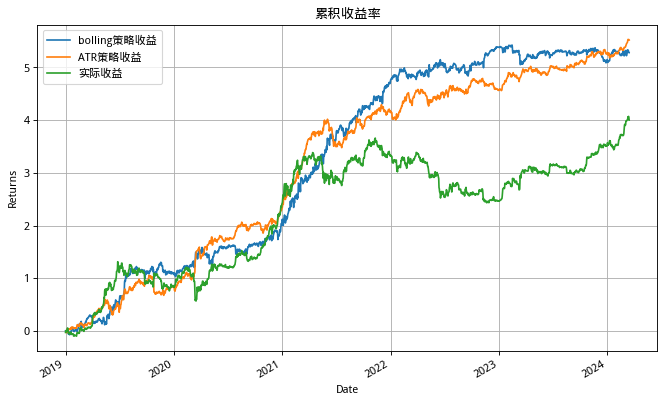

In [674]:
ini_ret = ff.read_binance(name).ret
ini_ret.index = pd.to_datetime(ini_ret.index)
# ini_close = (event_se*ini_close).dropna()
ini_day_ret = ini_ret.groupby(ini_ret.index.date).apply(lambda x:(x+1).prod() - 1)
# 设置图形的尺寸和分辨率
plt.figure(figsize=(10, 6), dpi=80)
# 绘制折线图
bolling_result[0].cumsum().plot()
ATR_result[0].cumsum().plot()
ini_day_ret.cumsum().plot()
# 添加标题和标签
plt.title('累积收益率')
plt.xlabel('Date')
plt.ylabel('Returns')
# 添加网格线
plt.grid(True)
# 添加图例
plt.legend(['bolling策略收益','ATR策略收益','实际收益'])
# 自动调整日期格式
plt.gcf().autofmt_xdate()
# 显示图形
plt.show()